# Install necessary libraries (uncomment and run if not already installed)

In [1]:
!pip install pandas numpy scikit-learn tensorflow matplotlib

# Importing required libraries/
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from sklearn.metrics import confusion_matrix, classification_report

# Load the fake profiles dataset

In [2]:
fake_df = pd.read_csv('fusers.csv')
fake_df['label'] = 0  # Label for fake profiles

# Load the real profiles dataset
real_df = pd.read_csv('users.csv')
real_df['label'] = 1  # Label for real profiles

# Display the first few rows of each dataset
print("Fake Profiles:")
display(fake_df.head())

print("\nReal Profiles:")
display(real_df.head())

# Merge the two datasets
merged_df = pd.concat([fake_df, real_df], axis=0).reset_index(drop=True)

# Shuffle the dataset to ensure random distribution
merged_df = merged_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the combined dataset
print("\nMerged Dataset:")
display(merged_df.head())

# Check for class imbalance
print("\nClass Distribution:")
print(merged_df['label'].value_counts())

Fake Profiles:


,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,...,is_translator,follow_request_sent,protected,verified,notifications,description,contributors_enabled,following,updated,label
0,80479674,YI YUAN,yi_twitts,29,19,255,1,0,Wed Oct 07 03:19:21 +0000 2009,http://www.jycondo.com,...,NaN,NaN,NaN,NaN,NaN,real estate sales,NaN,NaN,2013-06-12 18:38:35,0
1,82487179,Marcos Perez C,marcos_peca,1408,208,866,138,0,Wed Oct 14 23:40:17 +0000 2009,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-06-12 18:38:35,0
2,105830531,curti lorenzo,curtilorenzo,39,59,962,8,0,Sun Jan 17 16:46:52 +0000 2010,http://www.valcavargna.com/,...,NaN,NaN,NaN,NaN,NaN,le corna del capro scappato dal gregge s'infil...,NaN,NaN,2013-06-12 18:38:35,0
3,114488344,ruben dario toscano,gatito2710,59,7,49,4,0,Mon Feb 15 15:49:58 +0000 2010,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-06-12 18:38:35,0
4,123222267,Malek Khalaf,MalekKhalaf,987,60,521,61,1,Mon Mar 15 11:38:55 +0000 2010,http://www.facebook.com/Malek.AlBalawi,...,NaN,NaN,NaN,NaN,NaN,"MA student at JU, Interested in Juventus,Italy...",NaN,NaN,2013-06-11 17:39:44,0



Real Profiles:


,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,lang,...,description,contributors_enabled,following,created_at,timestamp,crawled_at,updated,test_set_1,test_set_2,label
0,1502026416,TASUKU HAYAKAWA,0918Bask,2177,208,332,265,1,NaN,ja,...,15years ago X.Lines24,NaN,NaN,Tue Jun 11 11:20:35 +0000 2013,2013-06-11 13:20:35,2015-05-02 06:41:46,2016-03-15 15:53:47,0,0,1
1,2492782375,ro_or,1120Roll,2660,330,485,3972,5,NaN,ja,...,保守見習い地元大好き人間。 経済学、電工、仏教を勉強中、ちなDeではいかんのか？ (*^◯^*),NaN,NaN,Tue May 13 10:37:57 +0000 2014,2014-05-13 12:37:57,2015-05-01 17:20:27,2016-03-15 15:53:48,0,0,1
2,293212315,bearclaw,14KBBrown,1254,166,177,1185,0,NaN,en,...,Let me see what your best move is!,NaN,NaN,Wed May 04 23:30:37 +0000 2011,2011-05-05 01:30:37,2015-05-01 18:48:28,2016-03-15 15:53:48,0,0,1
3,191839658,pocahontas farida,wadespeters,202968,2248,981,60304,101,http://t.co/rGV0HIJGsu,en,...,20. menna: #farida #nyc and the 80s actually y...,NaN,NaN,Fri Sep 17 14:02:10 +0000 2010,2010-09-17 16:02:10,2015-05-01 13:55:16,2016-03-15 15:53:48,0,0,1
4,3020965143,Ms Kathy,191a5bd05da04dc,82,21,79,5,0,NaN,en,...,Cosmetologist,NaN,NaN,Fri Feb 06 04:10:49 +0000 2015,2015-02-06 05:10:49,2015-05-02 01:17:32,2016-03-15 15:53:48,0,0,1



Merged Dataset:


,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,...,notifications,description,contributors_enabled,following,updated,label,timestamp,crawled_at,test_set_1,test_set_2
0,63478699,Randolph Reynoldson,MarLuth,1,8,550,0,0,Thu Aug 06 16:07:39 +0000 2009,NaN,...,NaN,NaN,NaN,NaN,2013-06-12 18:38:26,0,NaN,NaN,NaN,NaN
1,617025589,Noel Reynolds,noelreynoldswmx,37,21,336,0,0,Sun Jun 24 11:09:38 +0000 2012,NaN,...,NaN,Live eachday asif it's your last❤,NaN,NaN,2013-06-12 18:38:26,0,NaN,NaN,NaN,NaN
2,238588883,AhmeD,Engr_13,383,241,345,659,1,Sat Jan 15 14:46:09 +0000 2011,NaN,...,NaN,Muslim | Passionate | Positive | Reader ...,NaN,NaN,2016-03-15 15:56:14,1,2011-01-15 15:46:09,2015-05-01 16:10:55,0.0,0.0
3,616304133,Pauletta Hopkins,paulettaafxy,36,20,565,0,0,Sat Jun 23 15:51:46 +0000 2012,NaN,...,NaN,#TeamPittman #TeamGetMoney #TeamEngaged #TeamR...,NaN,NaN,2013-06-11 17:39:44,0,NaN,NaN,NaN,NaN
4,481913106,neil,fratstylesziall,21611,3535,2689,5201,16,Fri Feb 03 09:45:01 +0000 2012,NaN,...,NaN,"He strums the guitar, jumps up to 40 ft and he...",NaN,NaN,2016-03-15 16:04:19,1,2012-02-03 10:45:01,2015-05-01 13:04:04,0.0,0.0



Class Distribution:
label
1    3474
0    3351
Name: count, dtype: int64


# Check for missing values

In [3]:
print("\nMissing Values:")
print(merged_df.isnull().sum())

# Option 1: Drop rows with missing values
# merged_df = merged_df.dropna()

# Option 2: Fill missing values
# For numerical columns, fill with mean
numerical_cols = merged_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in numerical_cols:
    merged_df[col].fillna(merged_df[col].mean(), inplace=True)

# For categorical columns, fill with mode
categorical_cols = merged_df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    merged_df[col].fillna(merged_df[col].mode()[0], inplace=True)

# Verify no missing values remain
print("\nMissing Values After Handling:")
print(merged_df.isnull().sum())


Missing Values:
id                                       0
name                                     1
screen_name                              0
statuses_count                           0
followers_count                          0
friends_count                            0
favourites_count                         0
listed_count                             0
created_at                               0
url                                   5458
lang                                     0
time_zone                             4015
location                              1684
default_profile                       2759
default_profile_image                 6806
geo_enabled                           4531
profile_image_url                        0
profile_banner_url                    3593
profile_use_background_image           399
profile_background_image_url_https       0
profile_text_color                       0
profile_image_url_https                  0
profile_sidebar_border_color         

C:\Users\kamat\AppData\Local\Temp\ipykernel_11568\759224677.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df[col].fillna(merged_df[col].mean(), inplace=True)
C:\Users\kamat\AppData\Local\Temp\ipykernel_11568\759224677.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

# Identify categorical columns

In [4]:
categorical_cols = merged_df.select_dtypes(include=['object']).columns.tolist()

print("\nCategorical Columns:", categorical_cols)

# For simplicity, let's assume we drop textual columns like 'username' and 'bio'
# Alternatively, you can use embeddings or other techniques for text data
# Here, we'll drop them
merged_df = merged_df.drop(columns=['name', 'screen_name'])  # Replace with actual column names

# If there are any remaining categorical columns, apply Label Encoding or One-Hot Encoding
# Example: If there's a 'gender' column
if 'gender' in merged_df.columns:
    le = LabelEncoder()
    merged_df['gender'] = le.fit_transform(merged_df['gender'])


Categorical Columns: ['name', 'screen_name', 'created_at', 'url', 'lang', 'time_zone', 'location', 'profile_image_url', 'profile_banner_url', 'profile_background_image_url_https', 'profile_text_color', 'profile_image_url_https', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_background_image_url', 'profile_background_color', 'profile_link_color', 'description', 'updated', 'timestamp', 'crawled_at']


# Identify numerical columns (after dropping categorical/textual columns)

In [5]:
numerical_cols = merged_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('label')  # Exclude the target variable

print("\nNumerical Columns:", numerical_cols)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical features
merged_df[numerical_cols] = scaler.fit_transform(merged_df[numerical_cols])

# Display the scaled features
display(merged_df.head())


Numerical Columns: ['id', 'statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count', 'default_profile', 'default_profile_image', 'geo_enabled', 'profile_use_background_image', 'profile_background_tile', 'utc_offset', 'is_translator', 'follow_request_sent', 'protected', 'verified', 'notifications', 'contributors_enabled', 'following', 'test_set_1', 'test_set_2']


C:\Users\kamat\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\kamat\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\kamat\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


,id,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,lang,time_zone,...,notifications,description,contributors_enabled,following,updated,label,timestamp,crawled_at,test_set_1,test_set_2
0,-1.026530,-0.369212,-0.057710,0.039663,-0.278323,-0.088184,Thu Aug 06 16:07:39 +0000 2009,http://t.co/0c9HL6Xn9G,en,Pacific Time (US & Canada),...,NaN,nl,NaN,NaN,2013-06-12 18:38:26,0,2007-01-22 02:57:38,2015-05-01 12:56:29,-1.718488e-16,-1.117684e-16
1,-0.304043,-0.367678,-0.056653,-0.144947,-0.278323,-0.088184,Sun Jun 24 11:09:38 +0000 2012,http://t.co/0c9HL6Xn9G,en,Pacific Time (US & Canada),...,NaN,Live eachday asif it's your last❤,NaN,NaN,2013-06-12 18:38:26,0,2007-01-22 02:57:38,2015-05-01 12:56:29,-1.718488e-16,-1.117684e-16
2,-0.797977,-0.352937,-0.038768,-0.137183,-0.201226,-0.079330,Sat Jan 15 14:46:09 +0000 2011,http://t.co/0c9HL6Xn9G,en,Islamabad,...,NaN,Muslim | Passionate | Positive | Reader ...,NaN,NaN,2016-03-15 15:56:14,1,2011-01-15 15:46:09,2015-05-01 16:10:55,-8.911208e-01,-5.679826e-01
3,-0.304985,-0.367721,-0.056734,0.052603,-0.278323,-0.088184,Sat Jun 23 15:51:46 +0000 2012,http://t.co/0c9HL6Xn9G,en,Pacific Time (US & Canada),...,NaN,#TeamPittman #TeamGetMoney #TeamEngaged #TeamR...,NaN,NaN,2013-06-11 17:39:44,0,2007-01-22 02:57:38,2015-05-01 12:56:29,-1.718488e-16,-1.117684e-16
4,-0.480391,0.551451,0.229021,1.884899,0.330151,0.053479,Fri Feb 03 09:45:01 +0000 2012,http://t.co/0c9HL6Xn9G,en,Amsterdam,...,NaN,"He strums the guitar, jumps up to 40 ft and he...",NaN,NaN,2016-03-15 16:04:19,1,2012-02-03 10:45:01,2015-05-01 13:04:04,-8.911208e-01,-5.679826e-01


# Define features and target

In [6]:
X = merged_df.drop(columns=['label']).values
y = merged_df['label'].values

print("\nFeature Shape:", X.shape)
print("Target Shape:", y.shape)

# Reshape X for CNN input (samples, timesteps, features)
# Here, we'll treat each feature as a timestep with one feature per timestep
# This is one way to adapt tabular data for 1D CNN
X = X.reshape((X.shape[0], X.shape[1], 1))

print("\nReshaped Feature Shape for CNN:", X.shape)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTraining Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Feature Shape: (6825, 40)
Target Shape: (6825,)

Reshaped Feature Shape for CNN: (6825, 40, 1)

Training Set Shape: (5460, 40, 1)
Testing Set Shape: (1365, 40, 1)


# Define the CNN model

In [7]:
model = Sequential()

# Convolutional Layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

# Second Convolutional Layer
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.25))

# Flatten the output
model.add(Flatten())

# Fully Connected Layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()

C:\Users\kamat\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 38, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 19, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 19, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 17, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 8, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 156,289 (610.50 KB)

 Trainable params: 156,289 (610.50 KB)

 Non-trainable params: 0 (0.00 B)

# Identify numerical columns (after dropping categorical/textual columns)

In [8]:
# Identify numerical columns (after dropping categorical/textual columns)
numerical_cols = merged_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('label')  # Exclude the target variable

print("\nNumerical Columns:", numerical_cols)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical features
merged_df[numerical_cols] = scaler.fit_transform(merged_df[numerical_cols])

# Check and handle NaN or inf values after scaling
merged_df = merged_df.fillna(0) # Replace NaN with 0 
merged_df = merged_df.replace([np.inf, -np.inf], 0) # Replace inf with 0

# Display the scaled features
display(merged_df.head())


Numerical Columns: ['id', 'statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count', 'default_profile', 'default_profile_image', 'geo_enabled', 'profile_use_background_image', 'profile_background_tile', 'utc_offset', 'is_translator', 'follow_request_sent', 'protected', 'verified', 'notifications', 'contributors_enabled', 'following', 'test_set_1', 'test_set_2']


C:\Users\kamat\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\kamat\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\kamat\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


,id,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,lang,time_zone,...,notifications,description,contributors_enabled,following,updated,label,timestamp,crawled_at,test_set_1,test_set_2
0,-1.026530,-0.369212,-0.057710,0.039663,-0.278323,-0.088184,Thu Aug 06 16:07:39 +0000 2009,http://t.co/0c9HL6Xn9G,en,Pacific Time (US & Canada),...,0.0,nl,0.0,0.0,2013-06-12 18:38:26,0,2007-01-22 02:57:38,2015-05-01 12:56:29,-8.127417e-17,1.316219e-17
1,-0.304043,-0.367678,-0.056653,-0.144947,-0.278323,-0.088184,Sun Jun 24 11:09:38 +0000 2012,http://t.co/0c9HL6Xn9G,en,Pacific Time (US & Canada),...,0.0,Live eachday asif it's your last❤,0.0,0.0,2013-06-12 18:38:26,0,2007-01-22 02:57:38,2015-05-01 12:56:29,-8.127417e-17,1.316219e-17
2,-0.797977,-0.352937,-0.038768,-0.137183,-0.201226,-0.079330,Sat Jan 15 14:46:09 +0000 2011,http://t.co/0c9HL6Xn9G,en,Islamabad,...,0.0,Muslim | Passionate | Positive | Reader ...,0.0,0.0,2016-03-15 15:56:14,1,2011-01-15 15:46:09,2015-05-01 16:10:55,-8.911208e-01,-5.679826e-01
3,-0.304985,-0.367721,-0.056734,0.052603,-0.278323,-0.088184,Sat Jun 23 15:51:46 +0000 2012,http://t.co/0c9HL6Xn9G,en,Pacific Time (US & Canada),...,0.0,#TeamPittman #TeamGetMoney #TeamEngaged #TeamR...,0.0,0.0,2013-06-11 17:39:44,0,2007-01-22 02:57:38,2015-05-01 12:56:29,-8.127417e-17,1.316219e-17
4,-0.480391,0.551451,0.229021,1.884899,0.330151,0.053479,Fri Feb 03 09:45:01 +0000 2012,http://t.co/0c9HL6Xn9G,en,Amsterdam,...,0.0,"He strums the guitar, jumps up to 40 ft and he...",0.0,0.0,2016-03-15 16:04:19,1,2012-02-03 10:45:01,2015-05-01 13:04:04,-8.911208e-01,-5.679826e-01


# Train the model

In [16]:
# Convert X_train and y_train to float32 to ensure compatibility with TensorFlow
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

history = model.fit(
    X_train, y_train,
    epochs=50,  # Increase epochs for better learning
    batch_size=32,
    validation_split=0.2,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    ]
)

Epoch 1/50


ValueError: Exception encountered when calling Conv1D.call().

[1mNegative dimension size caused by subtracting 3 from 1 for '{{node sequential_1/conv1d_1_2/convolution}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](sequential_1/conv1d_1_2/convolution/ExpandDims, sequential_1/conv1d_1_2/convolution/ExpandDims_1)' with input shapes: [?,1,1,64], [1,3,64,128].[0m

Arguments received by Conv1D.call():
  • inputs=tf.Tensor(shape=(None, 1, 64), dtype=float32)

# Evaluate on test data

# Check and handle NaN or inf values in X_test

In [13]:
X_test = np.nan_to_num(X_test)  # Replace NaN and inf with 0

# Check for unsupported object types and convert them to numerical representations if necessary
for i in range (X_test.shape[0]):
  for j in range(X_test.shape[1]):
    if not isinstance(X_test[i,j], (int, float, np.number)):
      try:
        X_test[i,j] = float(X_test[i,j])
      except ValueError:
        # Handle cases where conversion to float is not possible
        X_test[i, j] = 0  # Or another appropriate handling strategy


# Convert X_test to float32 after handling NaN, inf, and dates
X_test = X_test.astype('float32')

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Predict on test data
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Classification Report
cr = classification_report(y_test, y_pred, target_names=['Fake', 'Real'])
print("\nClassification Report:")
print(cr)

C:\Users\kamat\AppData\Local\Temp\ipykernel_12004\3236870626.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_test[i,j] = float(X_test[i,j])



Test Accuracy: 0.4908
Test Loss: 0.6931
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

Confusion Matrix:
[[670   0]
 [695   0]]

Classification Report:
              precision    recall  f1-score   support

        Fake       0.49      1.00      0.66       670
        Real       0.00      0.00      0.00       695

    accuracy                           0.49      1365
   macro avg       0.25      0.50      0.33      1365
weighted avg       0.24      0.49      0.32      1365



C:\Users\kamat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kamat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kamat\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
# Assuming 'model' is your defined model and you have your training data (X_train, y_train)
# Train your model and store the training history

# Check and handle NaN or inf values in X_train
X_train = np.nan_to_num(X_train)  # Replace NaN and inf with 0

# Convert to string type to allow iteration over individual elements
X_train = X_train.astype(str)

# Iterate over each element in the array and try to convert dates
for i in range(X_train.shape[0]):
    for j in range(X_train.shape[1]):
        try:
            # Try converting using pandas Timestamp
            X_train[i, j] = pd.Timestamp(X_train[i, j]).timestamp()
        except:
            # If pandas fails, try using dateutil parser
            try:
                import dateutil.parser
                X_train[i, j] = dateutil.parser.parse(X_train[i, j]).timestamp()
            except:
                # Handle the case where date conversion fails 
                X_train[i,j] = 0 # Set a default value (e.g., 0)

# Convert X_train to float32 after handling NaN, inf, and dates
X_train = X_train.astype('float32')

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plotting Accuracy
plt.figure(figsize=(14, 6))

plt

Epoch 1/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4962 - loss: 0.6932 - val_accuracy: 0.5110 - val_loss: 0.6930
Epoch 2/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5164 - loss: 0.6930 - val_accuracy: 0.5110 - val_loss: 0.6930
Epoch 3/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5003 - loss: 0.6932 - val_accuracy: 0.5110 - val_loss: 0.6930
Epoch 4/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5146 - loss: 0.6929 - val_accuracy: 0.5110 - val_loss: 0.6929
Epoch 5/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5087 - loss: 0.6930 - val_accuracy: 0.5110 - val_loss: 0.6929
Epoch 6/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5004 - loss: 0.6933 - val_accuracy: 0.5110 - val_loss: 0.6929
Epoch 7/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5068 - loss: 0.6931 - val_accuracy: 0.5110 - val_loss: 0.6929
Epoch 8/10
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5125 - loss: 0.6929 - val_accuracy: 0

<module 'matplotlib.pyplot' from 'C:\\Users\\kamat\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

<Figure size 1400x600 with 0 Axes>

# Plotting Accuracy

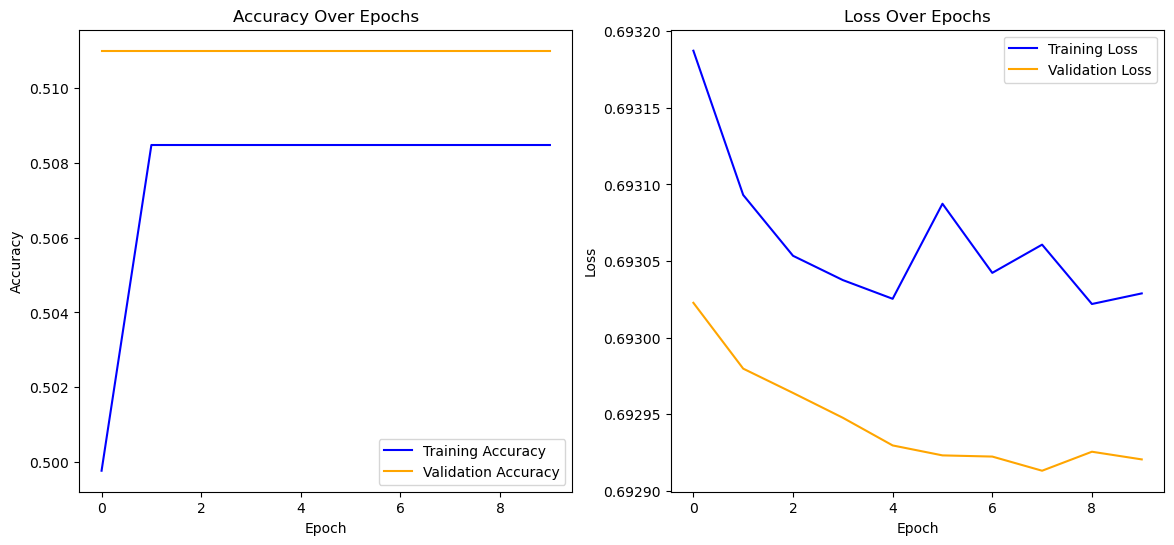

In [15]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()